# Data-Driven Approach to Predict the Success of Bank Telemarketing

## Objective
The objective is to establish features/characteristics that help a bank identify whether a customer will subscribe to a term deposit or not 

## Evaluation Metric

- Area under Curve
- ROC
- F1 score

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, auc,balanced_accuracy_score, roc_curve,precision_score,recall_score
from sklearn.decomposition import PCA, FactorAnalysis
import warnings

warnings.filterwarnings("ignore")

## Exploration

The dataset has 16 features and a target. It is comprises of Numeric and categorical columns. The dataset has no missing data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/komus/business_analytics/master/classification/bank-full.csv", sep=";")
data.shape

(45211, 17)

In [3]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Age
The mean, minimum, and maximum age is 41, 18 and 95 years. The maximum age (98) is greater than 2 std (10) from the 75 percentile (47) of the distribution indicating that the age distribution has outliers (right skewed).

Reviewing Age with occupation revealed that the retired are the ones who have the highest median age while student are the lowest even though people with blue-collar jobs have been contacted more by the bank


In [4]:
data['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

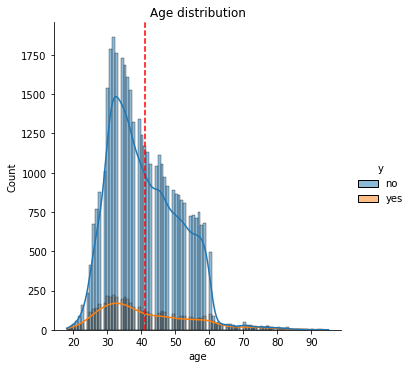

In [5]:
sns.displot(x = "age", data = data, hue="y", kde = True);
plt.title("Age distribution")
plt.axvline(x=data.age.mean(),
            color='red',
            ls='--', 
            lw=1.5);

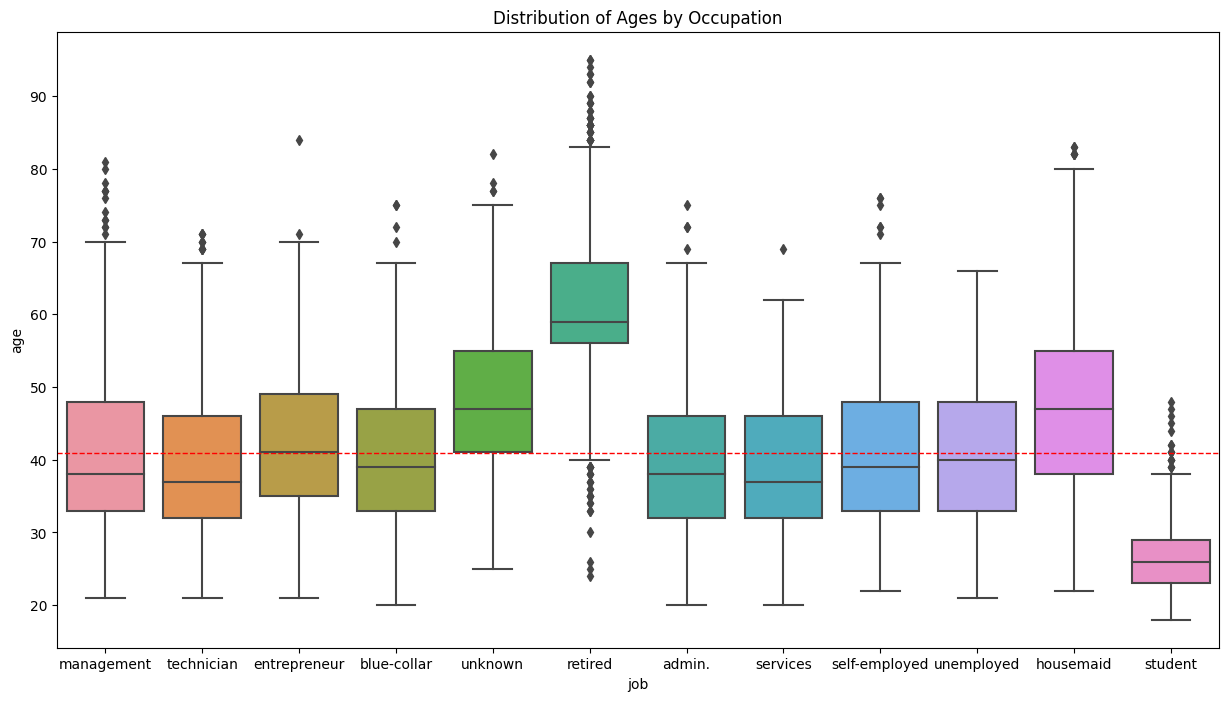

In [6]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=data, x="job", y = "age");
plt.axhline(data.age.mean(), color='red',
            ls='--', 
            lw=1);
plt.title("Distribution of Ages by Occupation");

In [7]:
data.job.value_counts(normalize=True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

### Balance

The balance feature has outliers. 

Balance shows that divorced individual are broke, this can be based on spliting of asset that occurs during the divorce process. Also management and retirees have the highest balances.

The level of education is also significant on the balance, people with tertiary education tend to have higher balances. 

People without loans have higher balances that people who do.

Therefore marital status, level of education, occupation and loans have significant impact on balance

In [8]:
data.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

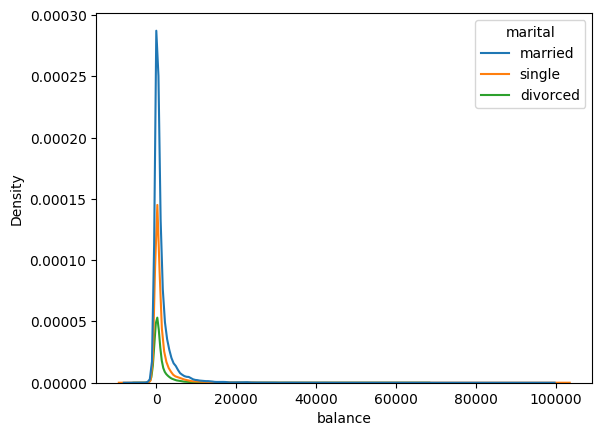

In [9]:
sns.kdeplot(data=data, x="balance", hue="marital");

In [10]:
balance = data.groupby(['job']).agg(balance_mean=('balance', np.mean),
                           balance_sum=('balance', np.sum),
                           balance_count=('balance', 'count')).reset_index()
balance.sort_values(by="balance_mean")


,job,balance_mean,balance_sum,balance_count
7,services,997.088108,4141904,4154
1,blue-collar,1078.826654,10499141,9732
0,admin.,1135.838909,5873423,5171
9,technician,1252.632092,9516246,7597
8,student,1388.060768,1302001,938
3,housemaid,1392.395161,1726570,1240
2,entrepreneur,1521.470074,2262426,1487
10,unemployed,1521.745971,1982835,1303
6,self-employed,1647.970868,2602146,1579
4,management,1763.616832,16680288,9458


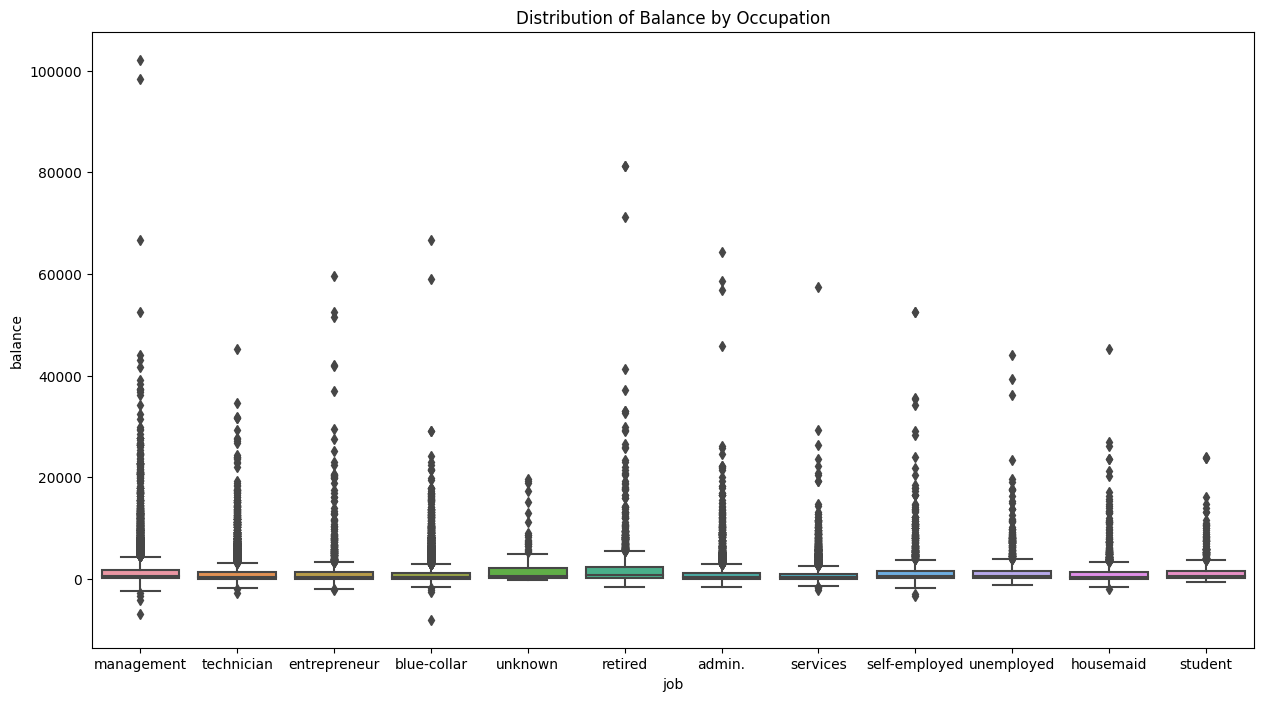

In [11]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=data, x="job", y = "balance");
plt.title("Distribution of Balance by Occupation");

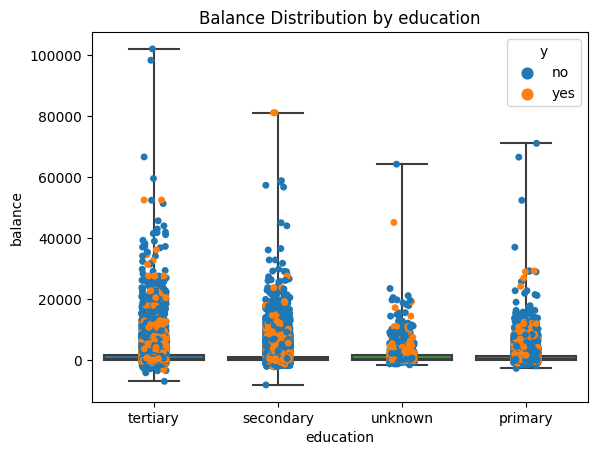

In [12]:
ax = sns.boxplot(x="education", y="balance", data=data, whis=np.inf)
ax = sns.stripplot(x="education", y="balance", hue = "y", data=data)
plt.title("Balance Distribution by education");

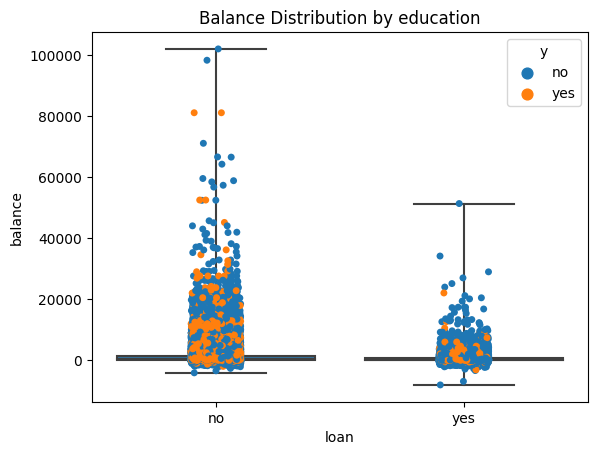

In [13]:
ax = sns.boxplot(x="loan", y="balance", data=data, whis=np.inf)
ax = sns.stripplot(x="loan", y="balance", hue = "y", data=data)
plt.title("Balance Distribution by education");

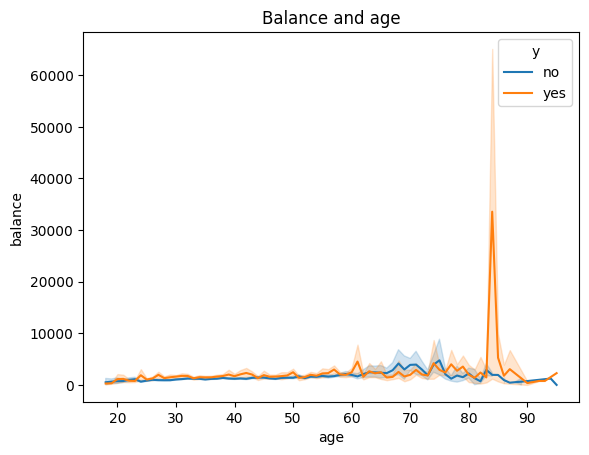

In [14]:
sns.lineplot(data=data, x = "age", y="balance", hue="y");
plt.title("Balance and age");

### Marital

60% of the dataset are married, more married people subscribed and turned down the term deposit, which can be influenced by the large proportion of married people in the dataset

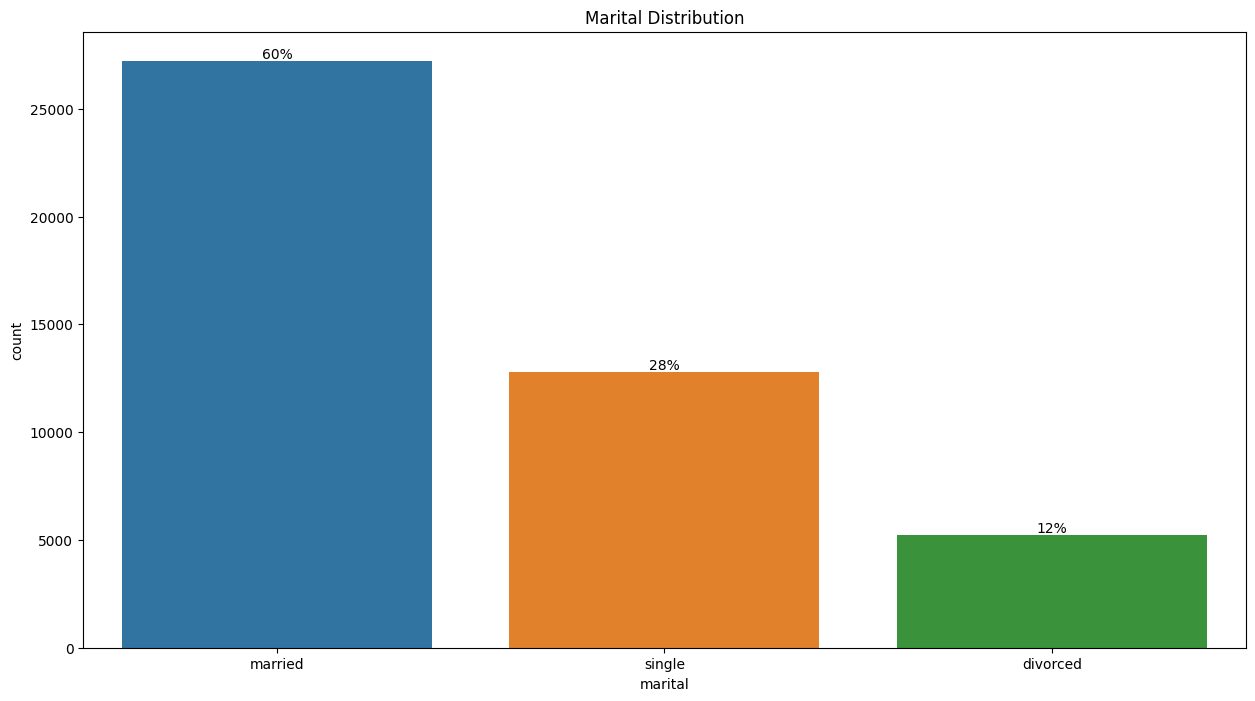

In [15]:
plt.figure(figsize=(15, 8))
g = sns.countplot(x="marital", data=data)
for p in g.patches:
  x = p.get_bbox().get_points()[:,0]
  y = p.get_bbox().get_points()[1,1]
  g.annotate('{:.2g}%'.format(100.*y/len(data)), (x.mean(), y), ha='center', va='bottom')
plt.title("Marital Distribution");

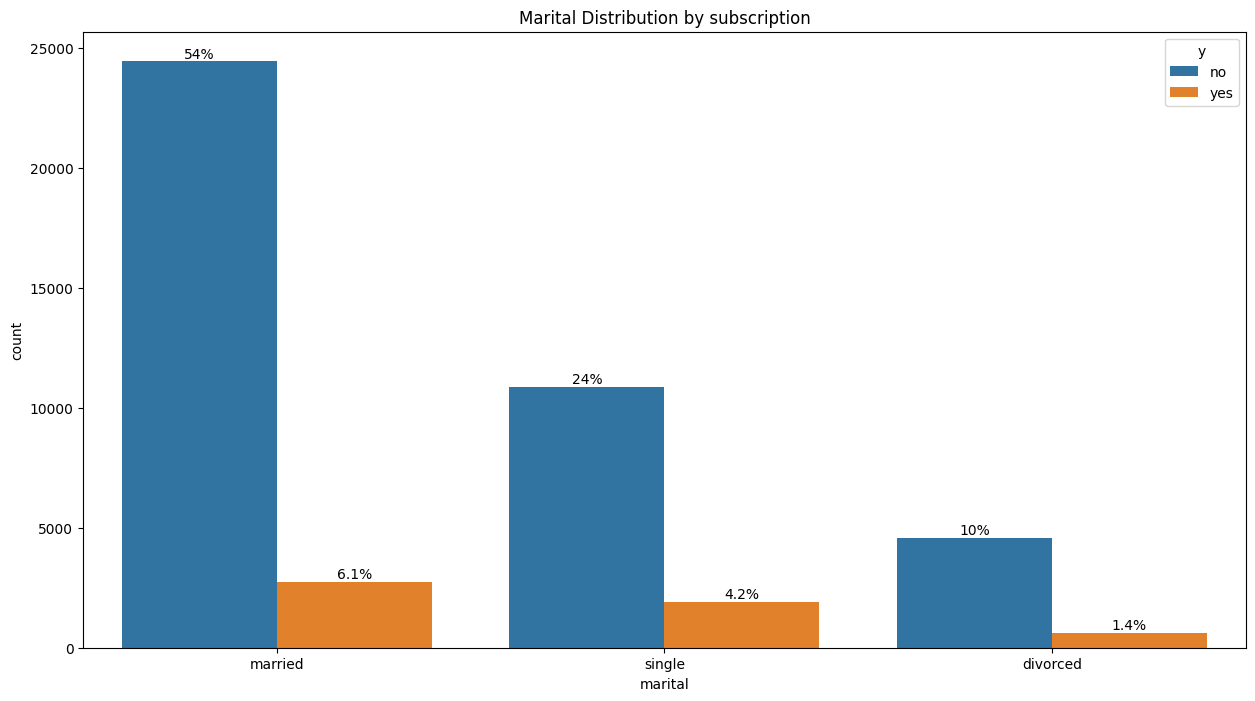

In [16]:
plt.figure(figsize=(15, 8))
g = sns.countplot(x="marital", data=data, hue ="y")
for p in g.patches:
  x = p.get_bbox().get_points()[:,0]
  y = p.get_bbox().get_points()[1,1]
  g.annotate('{:.2g}%'.format(100.*y/len(data)), (x.mean(), y), ha='center', va='bottom')
plt.title("Marital Distribution by subscription");

### Subscription - Target Variable

The target is highly imbalanced, the ratio of no to yes is 8:1

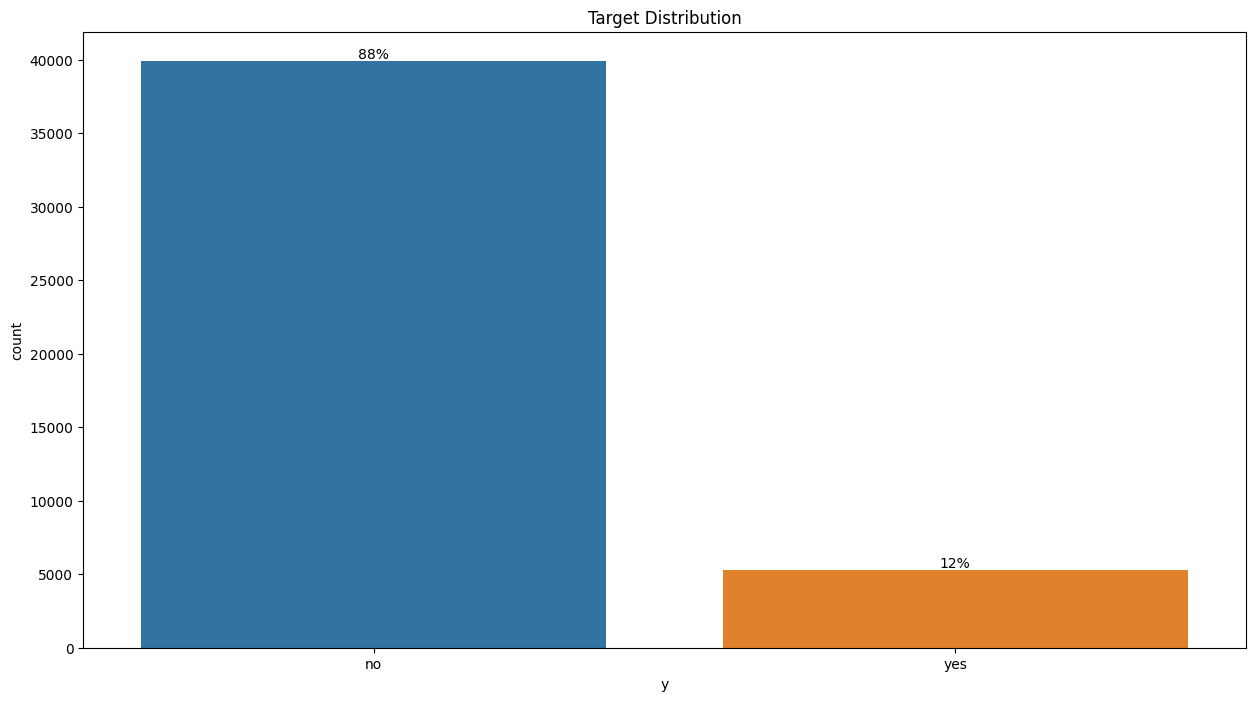

In [17]:
plt.figure(figsize=(15, 8))
g = sns.countplot(x="y", data=data)
for p in g.patches:
  x = p.get_bbox().get_points()[:,0]
  y = p.get_bbox().get_points()[1,1]
  g.annotate('{:.2g}%'.format(100.*y/len(data)), (x.mean(), y), ha='center', va='bottom')
plt.title("Target Distribution");

## Correlation

The numeric features have weak correlation to each other

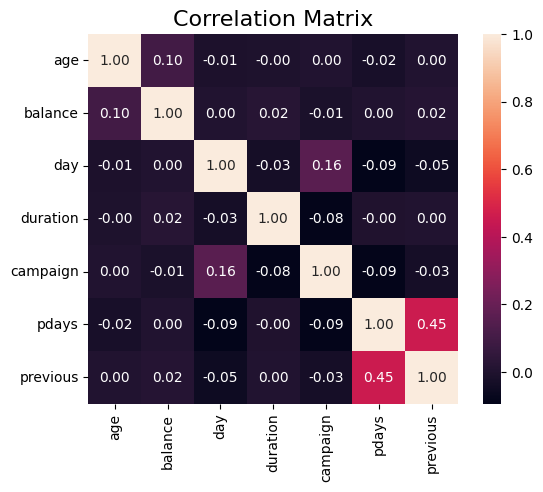

In [18]:
sns.heatmap(data.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title("Correlation Matrix", fontsize=16)
plt.show()

## Feature Engineering

Here the age feature is converted to categorical, this is to handle the outliers. 
The housing and loan categorical feature is also combined. A user with housing and loan returns yes. The target feature will be replaced with their boolean value

In [19]:
def categorize_age(x):
    if  x <= 0:
        return "unknown"
    elif x > 0 and x <= 25:
        return 'under 25'
    elif  x > 25 and x <= 35:
        return '26 - 35'
    elif x > 35 and x <= 45:
        return '36 - 45'
    elif x > 45 and x <= 55:
        return '46 - 55' 
    elif x > 56 and x <= 65:
        return '56 - 65'
    else:
        return 'over 65' 
    

def housing_and_loan(housing, loan):
    if housing == "yes" and loan == "yes":
        return "yes"
    elif housing == "no" and loan == "no":
        return "no"
    else:
        return "N/A"



In [20]:
target_map = {'yes': 1, 'no':0}
data["y"] = data["y"].map(target_map)

In [21]:
data['age_group'] = data['age'].apply(categorize_age)
data['house_loan'] = data.apply(lambda x: housing_and_loan(x['housing'], x['loan']), axis = 1)

### Splitting and scaling numeric features

To avoid data leakage, the data is separated into train and test for evaluation. 25% of the dataset will be used for testing the trained data.

In [22]:
target = data["y"]
features = data.drop(columns=['age', 'housing', 'loan', 'y'])
RANDOM_STATE = 100
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)

In [23]:
numerical_cols = features.select_dtypes(include='number').columns
categorical_cols = features.select_dtypes(exclude='number').columns

In [24]:
scaler = StandardScaler()
for col in numerical_cols:
    scaler.fit(train_x[col].values.reshape(-1, 1))
    test_x[col] = scaler.transform(test_x[col].values.reshape(-1,1))
    train_x[col] = scaler.transform(train_x[col].values.reshape(-1,1))

### Encoding of Categorical Data

One hot encoding creates column for each category and checks whether the category is present in that row or not. To avoid colinearity, the first column is dropped

In [25]:
ohe = OneHotEncoder(handle_unknown='ignore', drop="first", sparse = False)
ohe.fit(train_x[categorical_cols])
ohe_train_x = pd.DataFrame(ohe.transform(train_x[categorical_cols]))
ohe_test_x = pd.DataFrame(ohe.transform(test_x[categorical_cols]))
ohe_train_x.columns = ohe.get_feature_names_out()
ohe_test_x.columns = ohe.get_feature_names_out()

ohe_train_x.index = train_x.index
ohe_test_x.index = test_x.index

In [26]:
train_x = pd.concat([train_x, ohe_train_x], axis=1)
test_x = pd.concat([test_x, ohe_test_x], axis=1)

In [27]:
train_x = train_x.drop(categorical_cols, axis = 1)
test_x = test_x.drop(categorical_cols, axis = 1)

In [28]:
train_x.shape

(33908, 46)

In [29]:
test_x.shape

(11303, 46)

In [34]:
features_to_dump = pd.concat([train_x, test_x], axis = 0)
target_dump = pd.concat([train_y, test_y], axis = 0)

In [36]:
data_to_dump = pd.concat([features_to_dump, target_dump], axis = 1)

In [38]:
data_to_dump.to_csv("bank_data.csv")

# Modelling

since the target features are imbalanced, `class_weight='balanced'` will be used

## Baseline Model

The baseline model will use the entire features as a basis of comparism.

Using the baseline model results in a low precision score and a high false positive. Although the area under curve is high, precision and f1 score needs to be factored because the target is highly imbalanced.

In [ ]:
logreg = LogisticRegression(random_state=RANDOM_STATE,class_weight='balanced', max_iter=1000000)
logreg.fit(train_x, train_y)

LogisticRegression(class_weight='balanced', max_iter=1000000, random_state=100)

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': train_x.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)


In [ ]:
logreg_prob_y = logreg.predict_proba(test_x)
pred_y = logreg.predict(test_x)

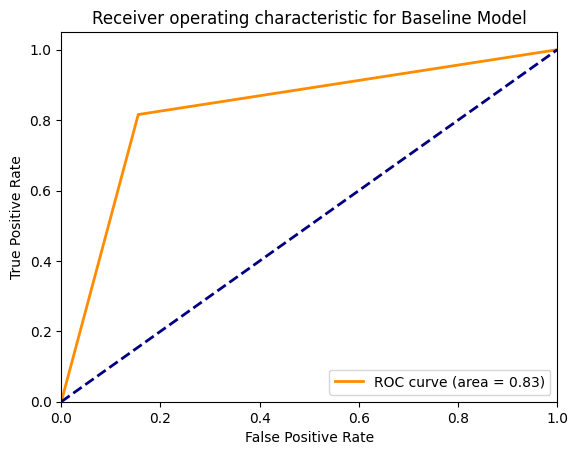

In [ ]:
fpr, tpr, _ = roc_curve(test_y.ravel(), pred_y.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic for Baseline Model")
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      9994
           1       0.41      0.82      0.54      1309

    accuracy                           0.84     11303
   macro avg       0.69      0.83      0.72     11303
weighted avg       0.91      0.84      0.86     11303



In [ ]:
tn, fp, fn, tp = confusion_matrix(test_y, pred_y).ravel()

In [ ]:
baseline_rst = {
    "model": "Baseline LG",
    "ROC": roc_auc,
    "f1 score": f1_score(test_y, pred_y ),
    "precision score": precision_score(test_y, pred_y),
    "recall score": recall_score(test_y, pred_y),
    "Type II: fn": fn,
    "type I: fp": fp
}

In [ ]:
result = pd.DataFrame(baseline_rst, index = [1])
result

,model,ROC,f1 score,precision score,recall score,Type II: fn,type I: fp
1,Baseline LG,0.830348,0.543788,0.407789,0.81589,241,1551


## PCA with 90% features

Dimentional reduction of 10% data loss resulted in lower ROC,f1, recall and precision score when compared to baseline model. There is also an increase in Type I and II error

In [ ]:
pca = PCA(0.90, random_state = RANDOM_STATE)
pca.fit(train_x)
pca_train_x = pca.transform(train_x)
pca_test_x = pca.transform(test_x)

In [ ]:
pca_lr = LogisticRegression(solver = 'lbfgs',random_state=RANDOM_STATE,class_weight='balanced', max_iter=1000000)
pca_lr.fit(pca_train_x, train_y)

LogisticRegression(class_weight='balanced', max_iter=1000000, random_state=100)

In [ ]:
pca_prob_y = pca_lr.predict_proba(pca_test_x)
pca_pred_y = pca_lr.predict(pca_test_x)

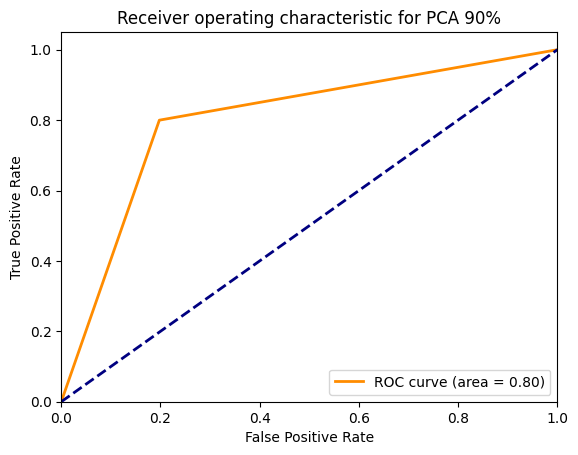

In [ ]:
fpr, tpr, _ = roc_curve(test_y.ravel(), pca_pred_y.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic for PCA 90%")
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(test_y, pca_pred_y))
tn, fp, fn, tp = confusion_matrix(test_y, pca_pred_y).ravel()

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      9994
           1       0.35      0.80      0.48      1309

    accuracy                           0.80     11303
   macro avg       0.66      0.80      0.68     11303
weighted avg       0.90      0.80      0.83     11303



In [ ]:
pca_90_rst = {
    "model": "PCA 90%",
    "ROC": roc_auc,
    "f1 score": f1_score(test_y, pca_pred_y),
    "precision score": precision_score(test_y, pca_pred_y),
    "recall score": recall_score(test_y, pca_pred_y),
    "Type II: fn": fn,
    "type I: fp": fp
}

In [ ]:
result = result.append(pca_90_rst, ignore_index = True)
result

,model,ROC,f1 score,precision score,recall score,Type II: fn,type I: fp
0,Baseline LG,0.830348,0.543788,0.407789,0.815890,241,1551
1,PCA 90%,0.801064,0.483380,0.346345,0.799847,262,1976


## PCA with 80% features


In [ ]:
pca_80 = PCA(0.80 , random_state = RANDOM_STATE)
pca_80.fit(train_x)
pca_80_train_x = pca_80.transform(train_x)
pca_80_test_x = pca_80.transform(test_x)

lr_pca_80 = LogisticRegression(random_state=RANDOM_STATE,class_weight='balanced', max_iter=1000000)
lr_pca_80.fit(pca_80_train_x, train_y)

LogisticRegression(class_weight='balanced', max_iter=1000000, random_state=100)

In [ ]:
pca_80_prob_y = lr_pca_80.predict_proba(pca_80_test_x)
pca_80_pred_y = lr_pca_80.predict(pca_80_test_x)

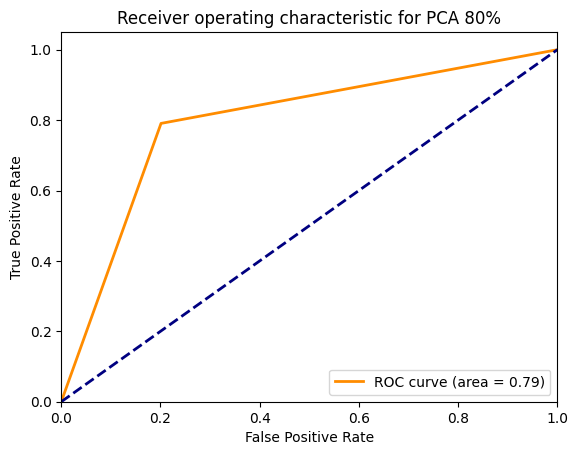

In [ ]:
fpr_80, tpr_80, _ = roc_curve(test_y.ravel(), pca_80_pred_y.ravel())
roc_auc_80 = auc(fpr_80, tpr_80)
plt.figure()
lw = 2
plt.plot(
    fpr_80,
    tpr_80,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc_80,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic for PCA 80%")
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(test_y, pca_80_pred_y))
tn, fp, fn, tp = confusion_matrix(test_y, pca_80_pred_y).ravel()

              precision    recall  f1-score   support

           0       0.97      0.80      0.87      9994
           1       0.34      0.79      0.48      1309

    accuracy                           0.80     11303
   macro avg       0.65      0.79      0.68     11303
weighted avg       0.89      0.80      0.83     11303



In [ ]:
pca_80_rst = {
    "model": "PCA 80%",
    "ROC": roc_auc_80,
    "f1 score": f1_score(test_y, pca_80_pred_y),
    "precision score": precision_score(test_y, pca_80_pred_y),
    "recall score": recall_score(test_y, pca_80_pred_y),
    "Type II: fn": fn,
    "type I: fp": fp
}
result = result.append(pca_80_rst, ignore_index = True)
result

,model,ROC,f1 score,precision score,recall score,Type II: fn,type I: fp
0,Baseline LG,0.830348,0.543788,0.407789,0.815890,241,1551
1,PCA 90%,0.801064,0.483380,0.346345,0.799847,262,1976
2,PCA 80%,0.794780,0.475425,0.339901,0.790680,274,2010


## Using number of components for dimension reduction

Seeing that PCA 90 and 80 percent have higher Type 1 and II error,  ROC, F1  and precision score, finding the optimum number of components for Factor Analysis is important 

In [ ]:
n_components = np.arange(0, train_x.shape[1], 5)

def compute_scores(X, y):
    fa = FactorAnalysis(max_iter = 1000000)
    fa_scores = []

    for n in n_components:
        fa.n_components = n
        fa_scores.append(np.mean(cross_val_score(fa, X, y)))

    return  fa_scores


In [ ]:
fa_scores = compute_scores(train_x, train_y)
n_components_fa = n_components[np.argmax(fa_scores)]

In [ ]:
n_components_fa

45

## Factor Analysis

In [ ]:
fa = FactorAnalysis(n_components = n_components_fa, random_state = RANDOM_STATE)
fa.fit(train_x)
fa_train_x = fa.transform(train_x)
fa_test_x = fa.transform(test_x)


lr_fa = LogisticRegression(random_state=RANDOM_STATE,class_weight='balanced', max_iter=1000000)
lr_fa.fit(fa_train_x, train_y)

LogisticRegression(class_weight='balanced', max_iter=1000000, random_state=100)

In [ ]:
fa_prob_y = lr_fa.predict_proba(fa_test_x)
fa_pred_y = lr_fa.predict(fa_test_x)

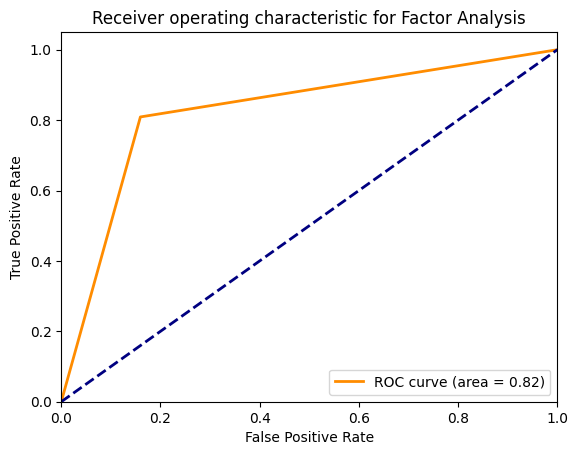

In [ ]:
fpr_fa, tpr_fa, _ = roc_curve(test_y.ravel(), fa_pred_y.ravel())
roc_auc_fa = auc(fpr_fa, tpr_fa)
plt.figure()
lw = 2
plt.plot(
    fpr_fa,
    tpr_fa,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc_fa,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic for Factor Analysis")
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(test_y, fa_pred_y))
tn, fp, fn, tp = confusion_matrix(test_y, fa_pred_y).ravel()

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      9994
           1       0.40      0.81      0.53      1309

    accuracy                           0.84     11303
   macro avg       0.69      0.82      0.72     11303
weighted avg       0.90      0.84      0.86     11303



In [ ]:
factor = {
    "model": "Factor Analysis",
    "ROC": roc_auc_fa,
    "f1 score": f1_score(test_y, fa_pred_y),
    "precision score": precision_score(test_y, fa_pred_y),
    "recall score": recall_score(test_y, fa_pred_y),
    "Type II: fn": fn,
    "type I: fp": fp
}
result = result.append(factor, ignore_index = True)
result

,model,ROC,f1 score,precision score,recall score,Type II: fn,type I: fp
0,Baseline LG,0.830348,0.543788,0.407789,0.815890,241,1551
1,PCA 90%,0.801064,0.483380,0.346345,0.799847,262,1976
2,PCA 80%,0.794780,0.475425,0.339901,0.790680,274,2010
3,Factor Analysis,0.824759,0.534578,0.399171,0.809015,250,1594


# Conclusion

The best logistic regression result (baseline model) was achieved using the full transformed features (46). The optimal number of components for dimension reduction using Factor Analysis resulted in 45, which is just a feature less than the baseline LG. 

In conclusion, since the best F1_score (Baseline LG) of 0.54 has a high type I error and low precision score, non linear and complex models should be used on the dataset
